# Imports

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.formula.api as smf
from Functions import *
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
make_firstdatextra = True
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Get data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
5,15670,high,0,"[3, 0]","[0, 3]",NaN,"[0, 3]","[3, 0]",NaN,NaN,"[0, 3]",NaN,NaN
6,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
9,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
10,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
12,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
15,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
17,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN
18,26641,high,0,"[1, 2]","[2, 1]",NaN,"[2, 1]","[1, 2]",NaN,NaN,"[2, 1]",NaN,NaN


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data['subtrial'] = all_data['subtrial'].astype(int)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (65,66) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0.0,0.0,0.0,6.683192,False,False,0.0,NaN,NaN,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0.0,0.0,0.0,6.485734,True,False,0.0,NaN,0.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0.0,0.0,0.0,7.184553,False,False,0.0,NaN,NaN,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0.0,0.0,0.0,5.625118,False,False,0.0,7.0,7.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0.0,0.0,0.0,6.714547,False,False,0.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251104,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251105,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251106,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251107,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# Results

## "Practicing" items after first discovery

### Prepare data

In [11]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'middle_item_both', 'subtrial']
first_dat = all_data.groupby(id_cols).aggregate('min').reset_index()[id_cols + ['trial']]
first_dat = first_dat.loc[first_dat['middle_item_both'] < 8]  # Only keep 4 non-items
first_dat['middle_item_both'] = first_dat['middle_item_both'].astype(int)
first_dat = first_dat.reset_index(drop=True)
first_dat

,sid,trial_type,phase,block,middle_item_both,subtrial,trial
0,13885,learning,high,0.0,0,1,0.0
1,13885,learning,high,0.0,0,3,13.0
2,13885,learning,high,0.0,1,1,14.0
3,13885,learning,high,0.0,1,3,5.0
4,13885,learning,high,0.0,2,1,23.0
...,...,...,...,...,...,...,...
16627,39520,transfer,low,7.0,1,3,2.0
16628,39520,transfer,low,7.0,2,1,5.0
16629,39520,transfer,low,7.0,2,3,15.0
16630,39520,transfer,low,7.0,4,1,7.0


In [12]:
def make_first_dat_extra(first_dat, trial_shifts=range(-5, 10)):

    first_dat_extra = pd.DataFrame()

    for row_i in range(first_dat.shape[0]):

        if (row_i % 50) == 1:
            print('{} of {} rows ({}%)                       '.format(
                row_i+1, first_dat.shape[0], 100 * np.round((row_i+1) / first_dat.shape[0], 3)), end='\r')

        for trial_shift in trial_shifts:
            row = first_dat.loc[row_i, ['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'middle_item_both']]
            row['trial'] += trial_shift
            row['trial_reltofirst'] = trial_shift
            first_dat_extra = first_dat_extra.append(row)
            
    first_dat_extra = first_dat_extra.rename(columns={'middle_item_both': 'middle_item_both_sequence', 'subtrial': 'subtrial_sequence'})
    first_dat_extra = first_dat_extra.loc[first_dat_extra['trial'] >= 0]
    first_dat_extra['trial_reltofirst'] = first_dat_extra['trial_reltofirst'].astype(int)
    first_dat_extra = first_dat_extra.reset_index(drop=True)
            
    return first_dat_extra

In [13]:
if make_firstdatextra:
    
    first_dat_extra = make_first_dat_extra(first_dat, trial_shifts=range(-5, 10))
    first_dat_extra.to_csv(os.path.join(data_dir, 'first_dat_extra.csv'), index=False)
else:

    first_dat_extra = pd.read_csv(os.path.join(data_dir, 'first_dat_extra.csv'))

In [14]:
first_dat_extra.loc[first_dat_extra['middle_item_both_sequence'] > 4][:30]

,block,middle_item_both_sequence,phase,sid,subtrial_sequence,trial,trial_reltofirst,trial_type
112,0.0,5.0,high,13885.0,3.0,6.0,-5,learning
113,0.0,5.0,high,13885.0,3.0,7.0,-4,learning
114,0.0,5.0,high,13885.0,3.0,8.0,-3,learning
115,0.0,5.0,high,13885.0,3.0,9.0,-2,learning
116,0.0,5.0,high,13885.0,3.0,10.0,-1,learning
117,0.0,5.0,high,13885.0,3.0,11.0,0,learning
118,0.0,5.0,high,13885.0,3.0,12.0,1,learning
119,0.0,5.0,high,13885.0,3.0,13.0,2,learning
120,0.0,5.0,high,13885.0,3.0,14.0,3,learning
121,0.0,5.0,high,13885.0,3.0,15.0,4,learning


In [15]:
f_dat = pd.merge(first_dat_extra, all_data, how='left')
f_dat[
    ['sid', 'phase', 'trial_type', 'block', 'trial', 'subtrial', 'action_id', 'middle_item_both_sequence', 'middle_item_both', 'subtrial_sequence', 'trial_reltofirst', ]
][40:70]

,sid,phase,trial_type,block,trial,subtrial,action_id,middle_item_both_sequence,middle_item_both,subtrial_sequence,trial_reltofirst
40,13885.0,high,learning,0.0,8.0,0.0,0.0,0.0,NaN,3.0,-5
41,13885.0,high,learning,0.0,8.0,1.0,1.0,0.0,0.0,3.0,-5
42,13885.0,high,learning,0.0,8.0,2.0,1.0,0.0,NaN,3.0,-5
43,13885.0,high,learning,0.0,8.0,3.0,3.0,0.0,11.0,3.0,-5
44,13885.0,high,learning,0.0,9.0,0.0,0.0,0.0,NaN,3.0,-4
45,13885.0,high,learning,0.0,9.0,1.0,1.0,0.0,0.0,3.0,-4
46,13885.0,high,learning,0.0,9.0,2.0,2.0,0.0,NaN,3.0,-4
47,13885.0,high,learning,0.0,9.0,3.0,3.0,0.0,1.0,3.0,-4
48,13885.0,high,learning,0.0,10.0,0.0,0.0,0.0,NaN,3.0,-3
49,13885.0,high,learning,0.0,10.0,1.0,1.0,0.0,0.0,3.0,-3


In [16]:
f_dat['sequence_item_bool'] = f_dat['middle_item_both_sequence'] == f_dat['middle_item_both']
f_dat['sequence_item_bool'] = f_dat['sequence_item_bool'].astype(int)
f_dat

,block,middle_item_both_sequence,phase,sid,subtrial_sequence,trial,trial_reltofirst,trial_type,rt,stimulus,...,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both,chance_performer,sequence_item_bool
0,0.0,0.0,high,13885.0,1.0,0.0,0,learning,797.865,0.0,...,0.0,0.0,6.683192,False,False,0.0,NaN,NaN,False,0
1,0.0,0.0,high,13885.0,1.0,0.0,0,learning,654.720,0.0,...,0.0,0.0,6.485734,True,False,0.0,NaN,0.0,False,1
2,0.0,0.0,high,13885.0,1.0,0.0,0,learning,1317.900,0.0,...,0.0,0.0,7.184553,False,False,0.0,NaN,NaN,False,0
3,0.0,0.0,high,13885.0,1.0,0.0,0,learning,276.305,0.0,...,0.0,0.0,5.625118,False,False,0.0,7.0,7.0,False,0
4,0.0,0.0,high,13885.0,1.0,1.0,1,learning,823.310,0.0,...,0.0,0.0,6.714547,False,False,0.0,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848278,7.0,4.0,low,39520.0,3.0,20.0,8,transfer,169.035,0.0,...,0.0,0.0,5.136004,True,True,1.0,NaN,2.0,False,0
848279,7.0,4.0,low,39520.0,3.0,21.0,9,transfer,138.995,0.0,...,0.0,0.0,4.941607,False,False,1.0,NaN,NaN,False,0
848280,7.0,4.0,low,39520.0,3.0,21.0,9,transfer,103.500,0.0,...,0.0,0.0,4.649187,True,False,1.0,NaN,1.0,False,0
848281,7.0,4.0,low,39520.0,3.0,21.0,9,transfer,97.605,0.0,...,0.0,0.0,4.591122,False,False,1.0,NaN,NaN,False,0


## Plot

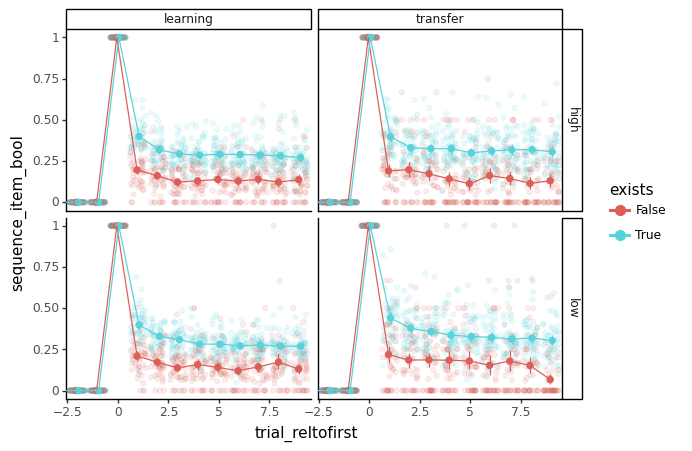

<ggplot: (134943272331)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\104_repeatItemsAfterDiscoveryByExist.png


In [17]:
f_dat['exists'] = f_dat['middle_item_both'] < 4
subj_dat = f_dat.loc[
    (f_dat['subtrial'] == f_dat['subtrial_sequence']) & (f_dat['middle_item_both'] < 8)
].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'exists']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'sequence_item_bool', color='exists', group='exists'))
     + gg.geom_point(alpha=0.1, position='jitter')
     + gg.stat_summary(position=gg.position_dodge(width=0.2))
     + gg.stat_summary(position=gg.position_dodge(width=0.2), geom='line')
     + gg.coord_cartesian(xlim=(-2, 9))
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '104_repeatItemsAfterDiscoveryByExist.png'))

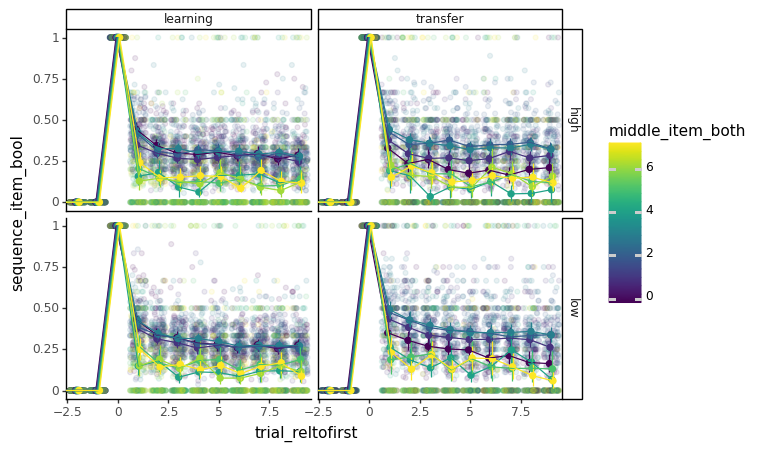

<ggplot: (134943272331)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\104_repeatItemsAfterDiscoveryByItem.png


In [18]:
subj_dat = f_dat.loc[
    (f_dat['subtrial'] == f_dat['subtrial_sequence']) & (f_dat['middle_item_both'] < 8)
].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'middle_item_both']).aggregate('mean').reset_index()

g += gg.aes(color='middle_item_both', group='middle_item_both')
g.data = subj_dat
print(g)
g.save(os.path.join(plot_dir, '104_repeatItemsAfterDiscoveryByItem.png'))

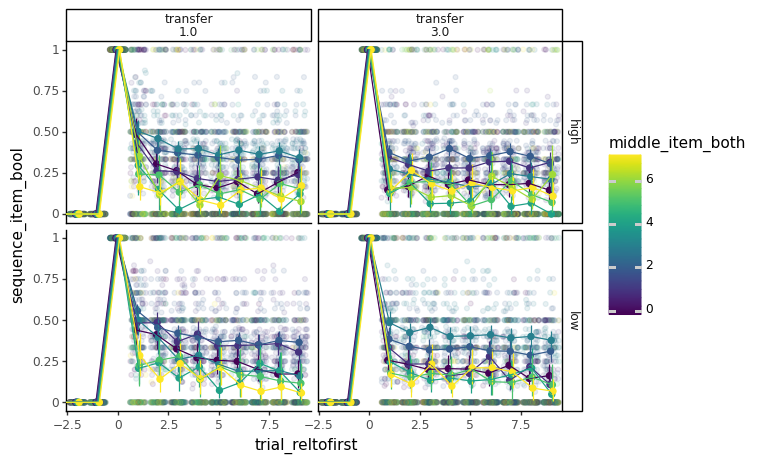

<ggplot: (134943272331)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_repeatItemsAfterDiscoveryByItemSubtrial.png


In [19]:
subj_dat = f_dat.loc[
    (f_dat['subtrial'] == f_dat['subtrial_sequence']) & (f_dat['middle_item_both'] < 8) & (f_dat['trial_type'] == 'transfer')
].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'middle_item_both', 'subtrial_sequence']).aggregate('mean').reset_index()

g += gg.facet_grid('phase ~ trial_type + subtrial_sequence')
g.data = subj_dat
print(g)
g.save(os.path.join('104_repeatItemsAfterDiscoveryByItemSubtrial.png'))

### first_dat_high

In [20]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'goal_star']
all_data['bool_unlocked_star'] = (np.invert(np.isnan(all_data['unlocked_star'])) & (all_data['unlocked_star'] > -1))
first_dat_high = all_data.loc[all_data['bool_unlocked_star']].groupby(id_cols).aggregate('min').reset_index()[id_cols + ['trial']]
first_dat_high

,sid,trial_type,phase,block,goal_star,trial
0,13885,learning,high,0.0,3.0,5.0
1,13885,learning,high,1.0,2.0,0.0
2,13885,learning,high,2.0,1.0,2.0
3,13885,learning,high,3.0,0.0,1.0
4,13885,learning,high,4.0,1.0,2.0
...,...,...,...,...,...,...
1828,39520,transfer,low,3.0,2.0,3.0
1829,39520,transfer,low,4.0,1.0,0.0
1830,39520,transfer,low,5.0,2.0,11.0
1831,39520,transfer,low,6.0,1.0,2.0


### first_dat_w

In [21]:
# # Look at difference in discovery between subtrial 1 and 3 -> does it transfer?
# first_dat['subtrial'] = first_dat['subtrial'].astype(int)
# first_dat_w = first_dat.pivot_table(
#     index=['sid', 'trial_type', 'phase', 'block', 'middle_item'],
#     columns=['subtrial'],
#     values=['trial']
# ).reset_index()
# first_dat_w.columns = [''.join([str(e) for e in f]) for f in first_dat_w.columns.values]
# first_dat_w['trial_diff_s1s3'] = np.abs(first_dat_w['trial1'] - first_dat_w['trial3'])
# first_dat_w

### first_dat_extra

In [22]:
# trial_shifts = range(-5, 10)
# first_dat_extra = pd.DataFrame()

# for row_i in range(first_dat.shape[0]):
    
#     if (row_i % 50) == 1:
#         print('{} of {} rows ({}%)                                                     '.format(
#             row_i+1, first_dat.shape[0], 100 * np.round((row_i+1) / first_dat.shape[0], 3)), end='\r')
    
#     for trial_shift in trial_shifts:
#         row = first_dat.loc[row_i, ['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'middle_item']]
#         row['trial'] += trial_shift
#         row['trial_reltofirst'] = trial_shift
#         first_dat_extra = first_dat_extra.append(row)

In [23]:
f_dat = pd.merge(first_dat_extra, all_data, how='left')

f_dat['same_item_again'] = 0
for item in set(first_dat['middle_item_both']):
    f_dat['bool_item_{}'.format(item)] = (f_dat['middle_item_both'] == item).astype(int)
    f_dat.loc[(f_dat['middle_item_both_sequence'] == item) & (f_dat['bool_item_{}'.format(item)] == 1), 'same_item_again'] = 1

f_dat[['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'trial_reltofirst', 'rt', 'action_id', 'middle_item_both',
       'subtrial_sequence', 'bool_item_0', 'bool_item_1', 'bool_item_5', 'same_item_again']][:30]

,sid,trial_type,phase,block,trial,subtrial,trial_reltofirst,rt,action_id,middle_item_both,subtrial_sequence,bool_item_0,bool_item_1,bool_item_5,same_item_again
0,13885.0,learning,high,0.0,0.0,0.0,0,797.865,0.0,NaN,1.0,0,0,0,0
1,13885.0,learning,high,0.0,0.0,1.0,0,654.720,1.0,0.0,1.0,1,0,0,1
2,13885.0,learning,high,0.0,0.0,2.0,0,1317.900,3.0,NaN,1.0,0,0,0,0
3,13885.0,learning,high,0.0,0.0,3.0,0,276.305,2.0,7.0,1.0,0,0,0,0
4,13885.0,learning,high,0.0,1.0,0.0,1,823.310,0.0,NaN,1.0,0,0,0,0
5,13885.0,learning,high,0.0,1.0,1.0,1,239.845,2.0,8.0,1.0,0,0,0,0
6,13885.0,learning,high,0.0,1.0,2.0,1,389.015,3.0,NaN,1.0,0,0,0,0
7,13885.0,learning,high,0.0,1.0,3.0,1,298.555,1.0,6.0,1.0,0,0,0,0
8,13885.0,learning,high,0.0,2.0,0.0,2,42.995,0.0,NaN,1.0,0,0,0,0
9,13885.0,learning,high,0.0,2.0,1.0,2,344.920,3.0,9.0,1.0,0,0,0,0


In [24]:
# f_dat = pd.merge(first_dat_extra, all_data, how='left')
# f_dat['same_item_again'] = 0

# for item in range(4):
#     f_dat['bool_item_{}'.format(item)] = (f_dat['middle_item'] == item).astype(int)
#     f_dat.loc[(f_dat['middle_item_sequence'] == item) & (f_dat['bool_item_{}'.format(item)] == 1), 'same_item_again'] = 1

# f_dat[['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'trial_reltofirst', 'rt', 'middle_item',
#        'middle_item_sequence', 'subtrial_sequence', 'bool_item_1']]

### perf_dat

In [25]:
subj_dat = first_dat_w.groupby(['sid', 'phase', 'trial_type']).aggregate('mean').reset_index().drop(columns=['block', 'middle_item'])
subj_dat

NameError: name 'first_dat_w' is not defined

In [ ]:
id_cols = ['sid', 'phase', 'trial_type']
perf_dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['rt', 'log_rt', 'acc']]
perf_dat = pd.merge(subj_dat, perf_dat)
perf_dat

# Results

## Choices around item discovery

In [ ]:
# f_dat['shape'] = f_dat['bool_middle_item'].apply(lambda x: 0 if np.isnan(x) or x == 0 else 1)
sub_dat = f_dat.loc[
    (f_dat['sid'].isin(list(set(f_dat['sid']))[:5])) &  # Display 10 participants to keep figure reasonable
    (f_dat['block'] == 0) #&  # Display only blocks 0 and 1
#     (f_dat['subtrial_sequence'] == '1')  # Only discovering item in 
     ]
sub_dat

In [ ]:
gg.options.figure_size = (10, 6)
g = (gg.ggplot(sub_dat, gg.aes('subtrial', 'trial_reltofirst', color='factor(key_press)', shape='factor(bool_middle_item)'))
     + gg.geom_point()
     + gg.facet_grid('trial_type ~ subtrial_sequence + sid', scales='free_x')#, labeller='label_both')
#      + gg.facet_grid('trial_type ~ subtrial_sequence + sid', scales='free_x')#, labeller='label_both')
    )
print(g)
g.save(os.path.join(plot_dir, '104_RawKeyPressesAroundItemDiscover.png'))
gg.options.figure_size = default_figure_size

## RTs around item discovery

In [ ]:
sub_dat_st2 = f_dat.loc[f_dat['subtrial_sequence'].isin([1]) & (f_dat['trial_reltofirst'].isin([-1, 0]))]

subj_dat = sub_dat_st2.groupby(['sid', 'phase', 'trial_type', 'subtrial', 'subtrial_sequence', 'trial_reltofirst', 'middle_item_sequence']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('factor(trial_reltofirst)', 'log_rt', color='phase', group='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.3))
     + gg.stat_summary(position=gg.position_dodge(width=0.3), geom='line')
     + gg.facet_grid('subtrial ~ trial_type', scales='free')
    )
g

In [ ]:
def get_diff_dat(sub_dat,
                 id_cols = ['sid', 'phase', 'trial_type', 'block', 'middle_item_sequence', 'subtrial_sequence', 'subtrial']):
    
    diff_dat = pd.merge(
        sub_dat.loc[sub_dat['trial_reltofirst'] == -1, id_cols + ['rt']],
        sub_dat.loc[sub_dat['trial_reltofirst'] == 0, id_cols + ['trial', 'trial_', 'rt']],
        on=id_cols, suffixes=['_pre', '_at']
    )
    diff_dat['rt_at_minus_pre'] = diff_dat['rt_at'] - diff_dat['rt_pre']
    diff_dat['changed_item'] = diff_dat['middle_item_sequence'].isin([2, 3])  # Which items were modified in low transfer?
    diff_dat = diff_dat.dropna()

    return diff_dat

# # Example use
# get_diff_dat(sub_dat)

In [ ]:
gg.options.figure_size = (5, 4)
diff_dat = get_diff_dat(sub_dat_st2)
g = (gg.ggplot(diff_dat, gg.aes('block', 'rt_at_minus_pre', color='factor(middle_item_sequence)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.3))
     + gg.stat_summary(position=gg.position_dodge(width=0.3), geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.facet_grid('phase ~ subtrial + trial_type')
    )
g

In [ ]:
subj_dat = diff_dat.groupby(['sid', 'trial_type', 'phase', 'subtrial']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 3)
g = (gg.ggplot(subj_dat, gg.aes('trial_type', 'rt_at_minus_pre', color='factor(phase)', group='factor(phase)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.3))
     + gg.stat_summary(position=gg.position_dodge(width=0.3), geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.labs(x='', color='', y='RT slowing after first item')
     + gg.facet_grid('~ subtrial')
    )
print(g)
g.save(os.path.join(plot_dir, 'rt_at_minus_preOverPhase.png'))

In [ ]:
subj_dat = diff_dat.groupby(['sid', 'trial_type', 'phase', 'changed_item', 'subtrial']).aggregate('mean').reset_index()

g = g + gg.aes(color='changed_item', group='changed_item') + gg.facet_grid('phase ~ subtrial')
g.data = subj_dat
g

In [ ]:
predictors = [
    '1',
    'block + phase * trial_type',
]

mod_dat = diff_dat.loc[diff_dat['subtrial'] == 2]
for pred in predictors:
    mod = smf.mixedlm(formula='rt_at_minus_pre ~ {}'.format(pred), data=mod_dat, groups=mod_dat['sid']).fit()
    print(mod.summary())

In [ ]:
subj_dat = f_dat.loc[(f_dat['subtrial_sequence'] == 1)].groupby(
    ['sid', 'phase', 'trial_type', 'trial_reltofirst', 'subtrial']).aggregate('mean').reset_index()

# Strong decrease in subtrial0 and subtrial1 RT! => Because we're learning this item :)
gg.options.figure_size = (5, 4)
g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'rt', color='subtrial', group='subtrial'))
     + gg.stat_summary(position=gg.position_dodge(width=0.5))
     + gg.stat_summary(geom='line', position=gg.position_dodge(width=0.5))
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.labs(x='Trial relative to first discovery of item')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '104_subtrialRtsOverTrialreltofirst.png'))

In [ ]:
g += gg.aes(y='log_rt')
g

In [ ]:
# RT zigzag low also seems to go down!
g += gg.aes(y='rt_zz_low', color='phase') + gg.facet_grid('~ trial_type') # + gg.stat_summary(gg.aes(y='rt_zz_high'), color='red')
g.data = g.data.loc[g.data['subtrial'] == 0]
print(g)
g.save(os.path.join('104_rtzzlowOverTrialreltofirst.png'))

In [ ]:
# But not high zigzag!
g += gg.aes(y='rt_zz_high')
print(g)
g.save(os.path.join('104_rtzzhighOverTrialreltofirst.png'))

## Trials it takes to transfer a sequence from positions01 to 23

In [ ]:
gg.options.figure_size = (5, 5)
g = (gg.ggplot(first_dat_w, gg.aes('block', 'trial_diff_s1s3', color='factor(middle_item)'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
#      + gg.labs(y='')
     + gg.facet_grid('phase ~ trial_type')
    )
g

In [ ]:
first_dat

In [ ]:
# Gradual decrease in the number of trials needed to activate middle_items
# In low transfer, 2 & 3 take much longer than 0 & 1 -> because they are new!
# In high transfer, previous knowledge is retained :)
g = (gg.ggplot(first_dat, gg.aes('block', 'trial', color='factor(middle_item)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.5))
     + gg.stat_summary(position=gg.position_dodge(width=0.5), geom='line')
     + gg.labs(y='Trial of first activation in block')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join('104_trialOfSequenceDiscoveryOverBlock.png'))

## Time to discover each goal star

In [ ]:
# Takes longer in low than high?
first_dat_high['n_unique_items'] = get_n_unique_items(first_dat_high)

g += gg.aes(color='factor(n_unique_items)', group='factor(goal_star)')
g.data = first_dat_high
print(g)
g.save(os.path.join('104_trialtofirstOverBlockForNuniqueitems.png'))

## Frequency of middle-layer item after first discovery

In [ ]:
first_dat

In [ ]:
first_dat1 = first_dat.loc[first_dat['subtrial'] == 1].reset_index()
first_dat3 = first_dat.loc[first_dat['subtrial'] == 3].reset_index()
first_dat1

In [ ]:
def make_first_dat_extra(first_dat, trial_shifts=range(-5, 10), subtrial=[]):

    first_dat_extra = pd.DataFrame()

    # Find trials around item discovery and concat into a dataframe
    for row_i in range(first_dat.shape[0]):

        if (row_i % 50) == 1:
            print('{} of {} rows ({}%)                       '.format(
                row_i+1, first_dat.shape[0], 100 * np.round((row_i+1) / first_dat.shape[0], 3)), end='\r')

        for trial_shift in trial_shifts:
            row = first_dat.loc[row_i, ['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'middle_item']]
            row['trial'] += trial_shift
            if subtrial:
                row['subtrial'] = subtrial
            row['trial_reltofirst'] = trial_shift
            first_dat_extra = first_dat_extra.append(row)
            
    # Beatify dataframe
    first_dat_extra = first_dat_extra.rename(columns={'middle_item': 'middle_item_sequence', 'subtrial': 'subtrial_sequence'})
    first_dat_extra = first_dat_extra.loc[first_dat_extra['trial'] >= 0]
    first_dat_extra['trial_reltofirst'] = first_dat_extra['trial_reltofirst'].astype(int)
    first_dat_extra = first_dat_extra.reset_index(drop=True)
            
    return first_dat_extra

# # Example use
# make_first_dat_extra(first_dat3[:100], subtrial=1)

In [ ]:
first_datnot_extra = make_first_dat_extra(first_dat_not[:100].rename(columns={'middle_item1_not': 'middle_item'}))
first_datnot_extra

In [ ]:
first_dat1_extra = make_first_dat_extra(first_dat1[:100], subtrial=1)
first_dat3_extra = make_first_dat_extra(first_dat3[:100], subtrial=1)

In [ ]:
first_dat1_extra['discovery_trial'] = 1
first_dat3_extra['discovery_trial'] = 3
first_datnot_extra['discovery_trial'] = 'no sequence'

In [ ]:
first_dat13_extra = pd.concat([
    first_dat1_extra,
    first_dat3_extra,
    first_datnot_extra
]).reset_index(drop=True)
first_dat13_extra

In [ ]:
f_dat13 = pd.merge(first_dat13_extra, all_data, how='left')
f_dat13['same_item_again'] = 0

for item in range(4):
    f_dat13['bool_item_{}'.format(item)] = (f_dat13['middle_item'] == item).astype(int)
    f_dat13.loc[(f_dat13['middle_item_sequence'] == item) & (f_dat13['bool_item_{}'.format(item)] == 1), 'same_item_again'] = 1

f_dat13[['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'trial_reltofirst', 'rt', 'middle_item',
       'middle_item_sequence', 'subtrial_sequence', 'bool_item_1']]

In [ ]:
f_dat13.columns

In [ ]:
subj_dat = f_dat13.loc[f_dat13['subtrial'] == 1].groupby([
    'sid', 'phase', 'trial_type', 'trial_reltofirst', 'discovery_trial'
]).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'same_item_again', color='factor(discovery_trial)'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
g

In [ ]:
f_dat['true_item'] = f_dat['middle_item_both'] < 4

In [ ]:
f_dat

In [ ]:
first_dat[:30]

In [ ]:
f_dat.loc[(f_dat['middle_item_both_sequence'] == 0) & (f_dat['trial_reltofirst'] <= 0) & (f_dat['bool_item_0'] == 1),
          ['sid', 'phase', 'trial_type', 'trial', 'block', 'trial_reltofirst', 'subtrial', 'middle_item_both_sequence', 'subtrial_sequence', 'action_id', 'bool_item_0']
         ][:30]

In [ ]:
subj_dat = f_dat.loc[(f_dat['middle_item_both_sequence'] == 0) & (f_dat['subtrial_sequence'] == 1)].groupby([
    'sid', 'phase', 'trial_type', 'trial_reltofirst', 'true_item', 'middle_item_both_sequence', 'block', 'subtrial_sequence',
]).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'bool_item_0', color='true_item'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase + subtrial_sequence ~ trial_type + middle_item_both_sequence')
    )
g

In [ ]:
subj_dat = f_dat.loc[f_dat['subtrial'] == 1].groupby([
    'sid', 'phase', 'trial_type', 'trial_reltofirst', 'true_item', 'middle_item_both_sequence', 'block', 'subtrial_sequence',
]).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'same_item_again', color='true_item'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase + subtrial_sequence ~ trial_type + middle_item_both_sequence')
    )
g

In [ ]:
f_dat = pd.merge(first_dat13_extra, all_data, how='left')
f_dat['same_item_again'] = 0

for item in np.unique(f_dat.loc[np.invert(np.isnan(f_dat['middle_item_both'])), 'middle_item_both']):
    f_dat['bool_item_{}'.format(item)] = (f_dat['middle_item'] == item)#.astype(int)
    f_dat.loc[(f_dat['middle_item_sequence'] == item) & (f_dat['bool_item_{}'.format(item)] == 1), 'same_item_again'] = 1

f_dat[['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'trial_reltofirst', 'rt', 'middle_item',
       'middle_item_sequence', 'subtrial_sequence', 'bool_item_1.0']]

In [ ]:
f_dat['same_item_again'] = 0
f_dat.loc[(f_dat['middle_item_sequence'] == 0) & (f_dat['bool_item_0.0'] == 1), 'same_item_again'] = 1
f_dat.loc[(f_dat['middle_item_sequence'] == 1) & (f_dat['bool_item_1.0'] == 1), 'same_item_again'] = 1
f_dat.loc[(f_dat['middle_item_sequence'] == 2) & (f_dat['bool_item_2.0'] == 1), 'same_item_again'] = 1
f_dat.loc[(f_dat['middle_item_sequence'] == 3) & (f_dat['bool_item_3.0'] == 1), 'same_item_again'] = 1
f_dat

In [ ]:
np.unique(f_dat.loc[f_dat['subtrial'] == f_dat['subtrial_sequence'], ['subtrial']])

In [ ]:
np.unique(subj_dat['subtrial'])

In [ ]:
np.mean(f_dat['bool_item_3.0'])

In [ ]:
g = (gg.ggplot(f_dat, gg.aes('trial_reltofirst', 'same_item_again'))
     + gg.stat_summary()
    )
g

In [ ]:
# subj_dat = first_dat_extra.groubpy(['sid', 'phase', 'trial_type', 'trial_reltofirst']).aggregate('mean').reset_index()
subj_dat = f_dat.loc[f_dat['subtrial'] == f_dat['subtrial_sequence']
                    ].groupby(['sid', 'phase', 'trial_type', 'acc', 'trial_reltofirst', 'subtrial_sequence', 'middle_item_sequence']).aggregate('mean').reset_index()

gg.options.figure_size = (8, 6)
g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'same_item_again', color='middle_item_sequence', group='middle_item_sequence'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.coord_cartesian(xlim=(-1, 9))
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.facet_grid('acc + phase ~ trial_type + subtrial_sequence', labeller='label_both')
    )
print(g)
g.save(os.path.join(plot_dir, '105_itemFrequencyOverTrialsreltofirst.png'))

In [ ]:
# same_item_again ~ star_performance + modified_item + trial_reltofirst + item_necessary_for_goal_star_at_this_position

In [ ]:
mod_dat = f_dat.loc[f_dat['trial_type'] == 'learning',
                    ['sid', 'same_item_again', 'trial_reltofirst', 'trial_type', 'subtrial_sequence', 'phase']].dropna()
mod = smf.mixedlm(
    formula='same_item_again ~ trial_reltofirst',
    data=mod_dat, groups=mod_dat['sid']
).fit()
mod.summary()

In [ ]:
mod_dat = f_dat.loc[f_dat['trial_type'] == 'transfer',
                    ['sid', 'same_item_again', 'trial_reltofirst', 'trial_type', 'subtrial_sequence', 'phase']].dropna()
mod = smf.mixedlm(
    formula='same_item_again ~ trial_reltofirst + C(subtrial_sequence) * phase',
    data=mod_dat, groups=mod_dat['sid']
).fit()
mod.summary()

In [ ]:
mod_dat = f_dat.loc[f_dat['trial_type'] == 'learning',
                    ['sid', 'same_item_again', 'trial_reltofirst', 'trial_type', 'subtrial_sequence', 'phase']].dropna()
mod = smf.mixedlm(
    formula='same_item_again ~ trial_reltofirst + C(subtrial_sequence) * phase',
    data=mod_dat, groups=mod_dat['sid']
).fit()
mod.summary()

In [ ]:
gg.options.figure_size = (5, 4)
subj_dat = f_dat.groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'middle_item_sequence']).aggregate('mean').reset_index()
g = g + gg.facet_grid('phase ~ trial_type')
g.data = subj_dat
g

In [ ]:
# subj_dat = first_dat_extra.groubpy(['sid', 'phase', 'trial_type', 'trial_reltofirst']).aggregate('mean').reset_index()
subj_dat = f_dat.loc[f_dat['subtrial'] == 1].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'subtrial_sequence', 'middle_item_sequence']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'bool_item_0.0', color='middle_item_sequence', group='middle_item_sequence'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.facet_grid('phase + subtrial_sequence ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '105_itemFrequencyOverTrialsreltofirst.png'))

In [ ]:
g += gg.aes(y='bool_item_1.0')
g

In [ ]:
g += gg.aes(y='bool_item_2.0')
g

In [ ]:
g += gg.aes(y='bool_item_3.0')
g

## Relationship between sequence transfer (`trial_diff_s1s3`) and overall performance?

In [ ]:
gg.options.figure_size = (8, 4)
g = (gg.ggplot(perf_dat, gg.aes('trial_diff_s1s3', 'acc', color='phase'))
     + gg.geom_point()
     + gg.geom_smooth(method='lm')
     + gg.facet_grid('~ trial_type')
    )
print(g)
g.save(os.path.join('104_accOverTrialDiffSequenceDiscorvery.png'))

In [ ]:
g += gg.aes(y='rt')
g

In [ ]:
g += gg.aes(y='rt_zz_low')
g

In [ ]:
g += gg.aes(y='rt_zz_high')
g

## Difference in learning curve between first presentation of each star

(First presentation of second star minus first presentation of first star -> is there a difference?)

In [ ]:
def get_diff_dat(all_data, blocks):
    
    t_dat = all_data.loc[(all_data['trial_type'] == 'transfer') & (all_data['block'].isin(blocks))]
    id_cols = ['sid', 'trial_type', 'phase', 'trial', 'subtrial']
    
    diff_dat = pd.merge(
        t_dat.loc[t_dat['block'] == blocks[0], id_cols + ['acc', 'rt', 'goal_star']],
        t_dat.loc[t_dat['block'] == blocks[1], id_cols + ['acc', 'rt', 'goal_star']],
        on=id_cols, suffixes=['_block{}'.format(blocks[0]), '_block{}'.format(blocks[1])]
    )
    diff_dat['acc_block{}_minus_{}'.format(blocks[1], blocks[0])] = \
        diff_dat['acc_block{}'.format(blocks[1])] - diff_dat['acc_block{}'.format(blocks[0])]
    
    return diff_dat

# # Example use
# get_diff_dat(all_data, [0, 1])

In [ ]:
blocks = [0, 1]
d = get_diff_dat(all_data, blocks)
id_cols = ['sid', 'trial_type', 'trial', 'subtrial']
dd_dat = pd.merge(d.loc[d['phase'] == 'high', id_cols + ['acc_block{}_minus_{}'.format(blocks[1], blocks[0])]],
         d.loc[d['phase'] == 'low', id_cols + ['acc_block{}_minus_{}'.format(blocks[1], blocks[0])]],
         on=id_cols, suffixes=['_high', '_low']
        )
dd_dat['{}minus{}_highminuslow'.format(blocks[1], blocks[0])] = dd_dat['acc_block1_minus_0_high'] - dd_dat['acc_block1_minus_0_low']
dd_dat

In [ ]:
g = (gg.ggplot(dd_dat, gg.aes('trial', '1minus0_highminuslow'))
     + gg.stat_summary()
     + gg.geom_hline(yintercept=0, linetype='dotted')
    )
g

In [ ]:
# Make sure we're comparing the same / different stars
d = get_diff_dat(all_data, [0, 2])
a = d.loc[np.invert(np.isnan(d['goal_star_block0'])), ['goal_star_block0', 'goal_star_block2']]
assert np.mean(a['goal_star_block0'] == a['goal_star_block2']) == 1

In [ ]:
for blocks in ([0, 1], [1, 2], [2, 3], [0, 2], [1, 3]):
    
    subj_dat = get_diff_dat(all_data, blocks).groupby(['sid', 'phase', 'trial']).aggregate('mean').reset_index()
    gg.options.figure_size = (3, 3)
    g = (gg.ggplot(subj_dat, gg.aes('trial', 'acc_block{}_minus_{}'.format(blocks[1], blocks[0]), color='phase'))
         + gg.stat_summary()
         + gg.stat_summary(geom='line')
         + gg.geom_hline(yintercept=0, linetype='dotted')
         + gg.labs(y='Acc. diff. 1st pres. each star (blocks {})'.format(blocks), color='')
        )
    print(g)